# **Logistic_Regression**, it gives category as its output unlike the LinearRegression models which predict the range of numeric values, it can have many classes but during visualisation 2-classes only as we have only 2Dplane.
## (*) Equation is:  ln(p/1-p)= b0 + b1.X1+ b2.X2+ b3.X3....(number of features)     
## (*)Here p refers the probability
## (*) Likelihood = product of all prob of all training datapoints.
## (*) SigmoidFunction used here which generates a curve in the graph based upon that probability decided for the datapoints.
## (*) Curve is chosed by getting maximum likelihood and sigmoidFunciton gives the maximum likelihood
## (*) LogousticRegression is a Linear Classifier in which the line classifying the categories(2) is starightline, {taken 2 bcz at 2dplane only 2classes canbe disaplyed}

## Importing libraries

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing datasets

In [80]:
#Dataset shows which age people with which salary would be able to buy a SUV, yes(1) no(0)
dataset=pd.read_csv("Social_Network_Ads.csv")
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

## Splitting the datasets

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

## **Feature Scaling** : Is required here as we dealing with logisticFunction that is SigmoidFunction, for avoiding numericInstability, done this

In [67]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

## Training the model on the training set

In [68]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

## Predicting a newResult

In [69]:
classifier.predict(sc_x.transform([[30,87000]]))

array([0])

## Predicting the model on the testingSet

In [70]:
Y_pred=classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(-1,1),Y_test.reshape(-1,1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Confusion Matrix for checking the accuracy

In [78]:
#Used to show how much correct prediction and incorrect-prediction is there
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

# 65 correct-prediction for "0" and 24 correct-prediction for "1"
# 8 incorect-prediction for "0" and 5 incorrect-prediction for "1"

[[63  5]
 [ 8 24]]


## Classification Report

In [72]:
#You can also print a matrix containing all values like recall, precision etc. using the following code:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.83      0.75      0.79        32

    accuracy                           0.87       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



## Accuracy Score


In [79]:
# Right metrics for the classification_Model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))

0.87


## Visualising the training_set results

<ipython-input-82-698dd6151b3f>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


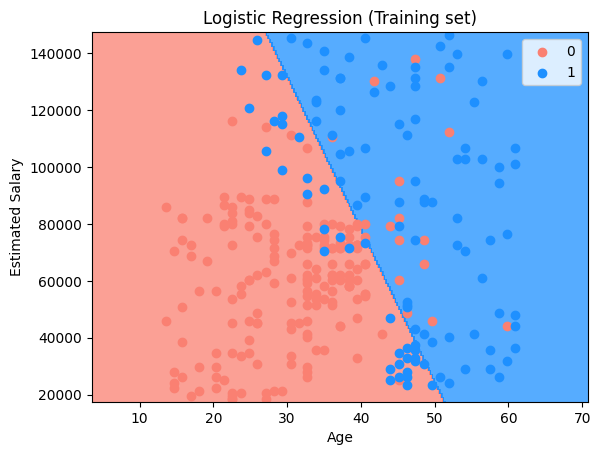

In [82]:
from matplotlib.colors import ListedColormap
X_set,Y_set= sc_x.inverse_transform(X_train),Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc_x.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the testing_set results

<ipython-input-83-d53b027de572>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


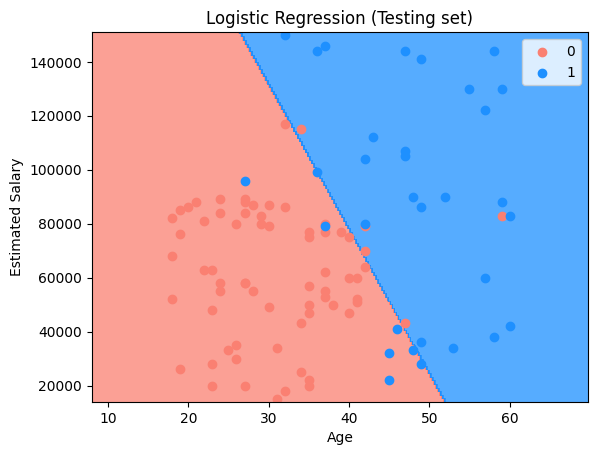

In [83]:
from matplotlib.colors import ListedColormap
X_set,Y_set= sc_x.inverse_transform(X_test),Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc_x.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#***LogisticRegression model is a LinearClassifier that's why it produced a straightLine for classifying the categories***